# Seasonal Auto Regression Integrated Moving Average (SARIMA) -  
As ARIMA models are able to handle trends in data, and to handle seasonality we use differencing method. This additional seasonal differencing in the step included, is called SARIMA method.  
  
Seasonal elements - These are not part of ARIMA, but to be used in SARIMA  
-> P : Seasonal auto-regression order  
-> D : Seasonal difference order  
-> Q : Seasonal moving average order  
-> m : The number of time steps for a single seasonal period  ( 12 for monthly, and 7 for weekly/daily seasonality )  
  
Some additional parameters in SARIMA -  
-> p : Trend auto-regression order  
-> d : Trend difference order  
-> q : Trend moving average order  
  
SARIMA (p, d, q) (P, D, Q) m  


In [96]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb 

# from datetime import datetime 
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot, autocorrelation_plot 

from statsmodels.graphics.tsaplots import plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.statespace.sarimax import SARIMAX  

import nbformat 
from IPython import get_ipython 
%matplotlib inline 

In [97]:
# %run "../Data_Preprocessing/preprocess_time_series.ipynb" 

with open("../Data_Preprocessing/preprocess_time_series.ipynb", "r", encoding="utf-8") as f:
    notebook1 = nbformat.read(f, as_version=4)

ipython = get_ipython() 

for cell in notebook1.cells:
    if cell.cell_type == "code":
        print(cell.source) 
        if ("fem_birth_data" in cell.source or "series" in cell.source or "features_fbth" in cell.source or "airl_miles_data2" in cell.source): 
            ipython.run_cell(cell.source, silent=True) 
            # ipython.run_cell_async(cell.source, silent=True) 

try:
    print("\nTotal female birth Data : ")
    print(fem_birth_data.head())   # type: ignore 
    
except NameError as e:
    print(f"Variable not found: {e}")

import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sb 

from pandas.plotting import lag_plot, autocorrelation_plot 
%matplotlib inline 
fem_birth = pd.read_csv('../Datasets/daily-total-female-births-CA.csv', header=0) 
fem_birth 
fem_birth['date'].dtype 
dateparse = lambda x: pd.to_datetime(x, format='%Y-%m-%d')   
fem_birth_data = pd.read_csv('../Datasets/daily-total-female-births-CA.csv', header=0, parse_dates=[0], date_format=dateparse)  
fem_birth_data  
fem_birth_data['date'].dtype 
fem_birth_data = pd.read_csv('../Datasets/daily-total-female-births-CA.csv', header=0, parse_dates=[0])     # parse_dates = [date_column]  
fem_birth_data    
fem_birth_data['date'].dtype 
fem_birth_data.shape 
print(f" Births in January : \n{ fem_birth_data[(fem_birth_data['date'] >= '1959-01-01') & (fem_birth_data['date'] <= '1959-02-01')] } ")  
 Births in January : 
         date  births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1

In [98]:
airl_miles_data2     # type: ignore   

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462
...,...,...
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595


In [99]:
airl_miles_data2.index = pd.to_datetime(airl_miles_data2['Month'])      # type: ignore 
airl_miles_data2    # type: ignore 

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462
...,...,...
1970-08-01,1970-08-01,14057
1970-09-01,1970-09-01,16234
1970-10-01,1970-10-01,12389


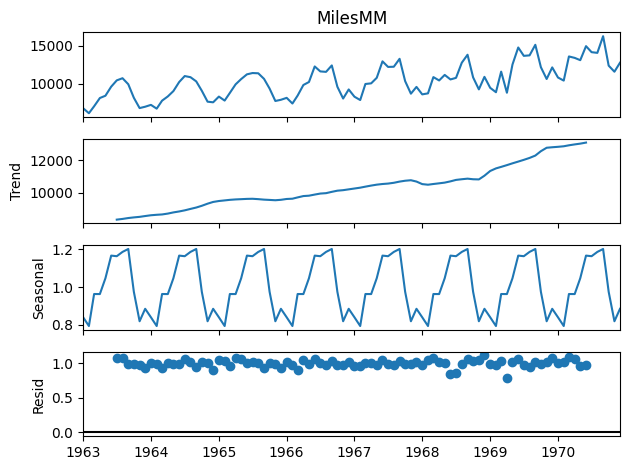

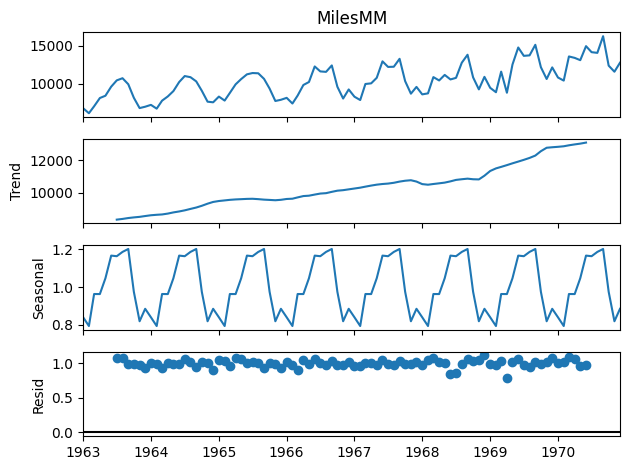

In [100]:
result_a = seasonal_decompose(airl_miles_data2['MilesMM'], model='multiplicative')     # type: ignore 
result_a.plot() 

SARIMA usage - 

d:\Machine_Learning_PY\virtl_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Machine_Learning_PY\virtl_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Machine_Learning_PY\virtl_env\Lib\site-packages\statsmodels\base\optimizer.py:737: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
d:\Machine_Learning_PY\virtl_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1971-01-01    11241.610022
1971-02-01    11174.964917
1971-03-01    14761.623892
1971-04-01    11670.937052
1971-05-01    14233.705453
1971-06-01    16708.342220
1971-07-01    15454.313338
1971-08-01    15018.512494
1971-09-01    17652.128262
1971-10-01    14415.931354
1971-11-01    12155.385705
1971-12-01    14066.518882
Freq: MS, Name: predicted_mean, dtype: float64

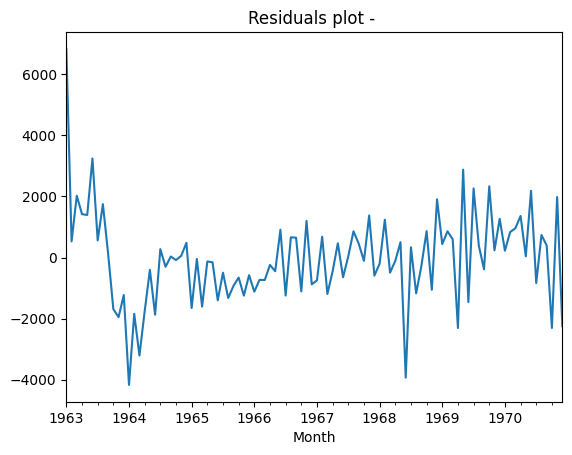

In [101]:
sarima_model = SARIMAX(airl_miles_data2['MilesMM'],   # type: ignore 
                       order=(5, 1, 3), 
                     #   order=(2, 2, 5), 
                     #   order=(2, 1, 1), 
                       seasonal_order=(1, 1, 1, 12), 
                       enforce_stationarity=False,   # Allow non-stationary AR parameters 
                       enforce_invertibility=False)   # Allow non-invertible MA parameters  

# sarima = sarima_model.fit(maxiter=3000, method='nm')  
sarima = sarima_model.fit(method='nm')  

residuals = sarima.resid 
plt.title("Residuals plot - ")
residuals.plot()  

# sarima_frc = sarima.forecast() 
sarima_frc = sarima.forecast(steps=12)  
# print("\nForecast : ") 
sarima_frc  

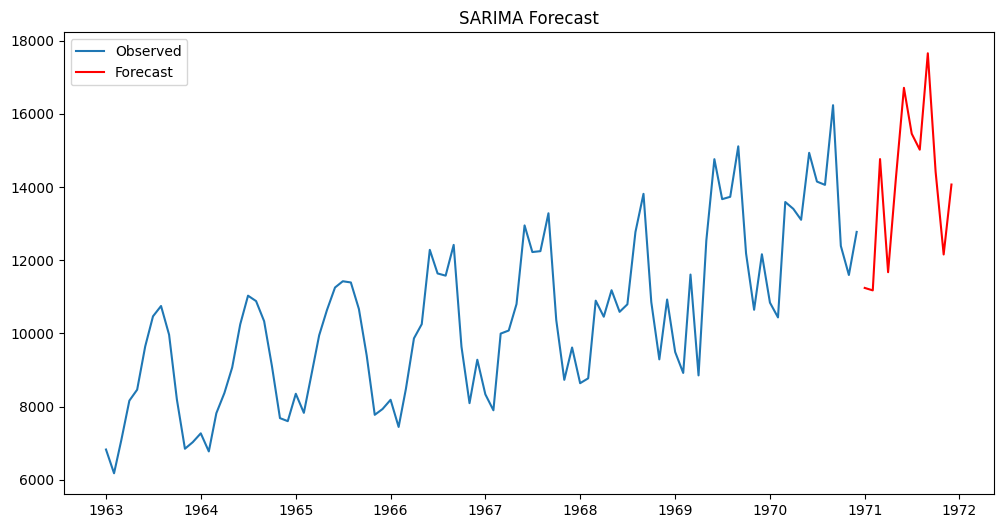

In [102]:
plt.figure(figsize=(12, 6)) 
plt.plot(airl_miles_data2['MilesMM'], label='Observed')     # type: ignore 
plt.plot(sarima_frc, label='Forecast', color='red') 
plt.title('SARIMA Forecast') 
plt.legend() 
plt.show() 

In [103]:
y_hat = sarima.predict() 
y_hat 

1963-01-01        0.000000
1963-02-01     5649.912332
1963-03-01     5062.162151
1963-04-01     6742.925873
1963-05-01     7068.551025
                  ...     
1970-08-01    13319.387892
1970-09-01    15838.452470
1970-10-01    14692.582043
1970-11-01     9613.885903
1970-12-01    15018.205734
Freq: MS, Name: predicted_mean, Length: 96, dtype: float64

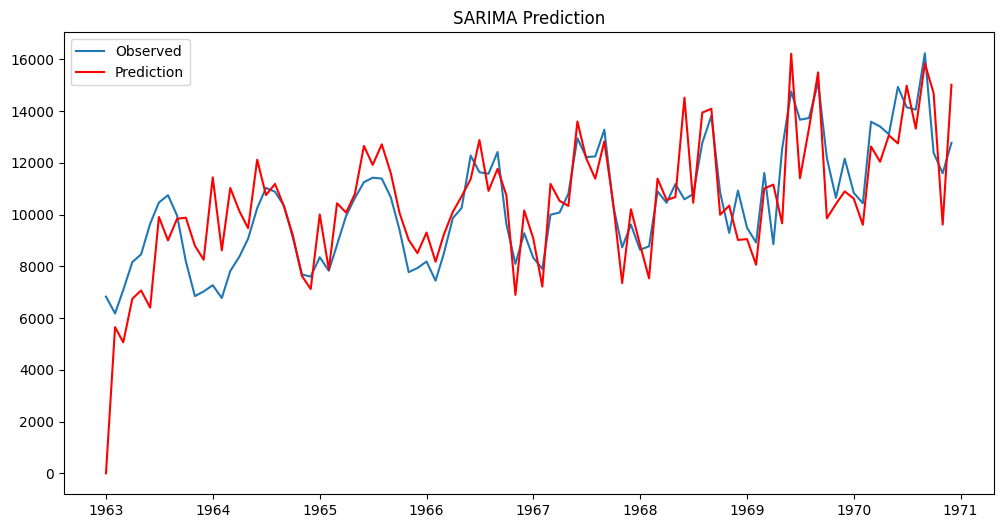

In [104]:
plt.figure(figsize=(12, 6)) 
plt.plot(airl_miles_data2['MilesMM'], label='Observed')     # type: ignore 
plt.plot(y_hat, label='Prediction', color='red') 
plt.title('SARIMA Prediction') 
plt.legend() 
plt.show() 